In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import mediapipe as mp

In [2]:
#Build Keypoints using MP Holistic 
mp_holistic = mp.solutions.holistic # Holistic model 
mp_drawing = mp.solutions.drawing_utils # Drawing utilities 

In [3]:
def mediapipe_detection(image, model): 
    #As to why we are changing the image from BGR2RGB OPENCV reads the image in BGR but mediapipe holistic model needs RGB image for detection
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    results = model.process(image)                 # Make prediction 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR CONVERSION RGB 2 BGR 
    return image, results

In [4]:
def draw_landmarks(image, results): 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,  
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),  
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2) 
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,  
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),  
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                             )

In [5]:
data_path = os.path.join("model_data")

actions = []

for i in range(65,91):
    actions.append(chr(i))
    
sequences_no = 60

sequences_length = 30

In [6]:
# Making Directories to store the data
for action in actions:
    for sequence in range(sequences_no):
        try:
            os.makedirs(os.path.join(data_path,str(action),str(sequence)))
        except:
            pass

In [7]:
def extract_keypoints(results):
    lh = []
    rh = []
    if(results.right_hand_landmarks):
        for res in results.right_hand_landmarks.landmark:
            test = np.array([res.x,res.y,res.z])
            rh.append(test)
    else:
        rh = np.zeros(21*3)
    if(results.left_hand_landmarks):
        for res in results.left_hand_landmarks.landmark:
            test = np.array([res.x,res.y,res.z])
            lh.append(test)
    else:
        lh = np.zeros(21*3)
    lh = np.array(lh).flatten()
    rh = np.array(rh).flatten()
    return np.concatenate([lh,rh])

In [8]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic: 
    for action in actions:
        for sequence in range(sequences_no):
            for frame_num in range(sequences_length):
                    # Reading the Video Capture
                    ret , frame = cap.read()

                    # Passing the frame to the Mediapipe holistic model for prediction
                    image, results = mediapipe_detection(frame, holistic)
                    
                    #Drawing Landmarks to the image
                    draw_landmarks(image,results)
                    
                    if frame_num==0:
                        cv2.flip(image,1)
                        cv2.putText(image, "Starting Collection", (200,200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)
                        cv2.putText(image, "Frames for {} Video Number {}".format(action,sequence), (10,25),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
                        cv2.imshow("Feed",image) #Flipping the image because the image previously was mirrored 1- Horizontal Flip 0- Vertical Flip
                        cv2.waitKey(1000)
 
                    else :
                        cv2.flip(image,1)
                        cv2.putText(image, "Frames for {} Video Number {}".format(action,sequence), (10,25),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
                        cv2.imshow("Feed",image) #Flipping the image because the image previously was mirrored 1- Horizontal Flip 0- Vertical Flip
 
                    keypoints = extract_keypoints(results)
                    save_path = os.path.join(data_path,action,str(sequence),str(frame_num))
                    np.save(save_path,keypoints)

                    if (cv2.waitKey(10) & 0xFF) == ord('q'):
                        break
    cap.release()
    cv2.destroyAllWindows()

In [14]:
results.right_hand_landmarks

landmark {
  x: 0.32323796
  y: 0.71775347
  z: -5.2963e-07
}
landmark {
  x: 0.3565044
  y: 0.66214615
  z: 0.0067747016
}
landmark {
  x: 0.39501503
  y: 0.6369489
  z: 0.005395032
}
landmark {
  x: 0.4344231
  y: 0.6152598
  z: 0.0027659652
}
landmark {
  x: 0.46039215
  y: 0.59994435
  z: 0.0008657355
}
landmark {
  x: 0.4378964
  y: 0.66754067
  z: 0.0008528577
}
landmark {
  x: 0.45599073
  y: 0.6555412
  z: 0.0066615134
}
landmark {
  x: 0.43505234
  y: 0.65475005
  z: 0.011037625
}
landmark {
  x: 0.4192637
  y: 0.659957
  z: 0.013098873
}
landmark {
  x: 0.44078624
  y: 0.6992559
  z: -0.0013185667
}
landmark {
  x: 0.45712575
  y: 0.68068624
  z: 0.009154667
}
landmark {
  x: 0.43871352
  y: 0.6767838
  z: 0.01350873
}
landmark {
  x: 0.4225664
  y: 0.682659
  z: 0.012089614
}
landmark {
  x: 0.4341921
  y: 0.72748375
  z: -0.0010086535
}
landmark {
  x: 0.44875482
  y: 0.70579255
  z: 0.010233041
}
landmark {
  x: 0.43303564
  y: 0.70264393
  z: 0.017011015
}
landmark {
  x:

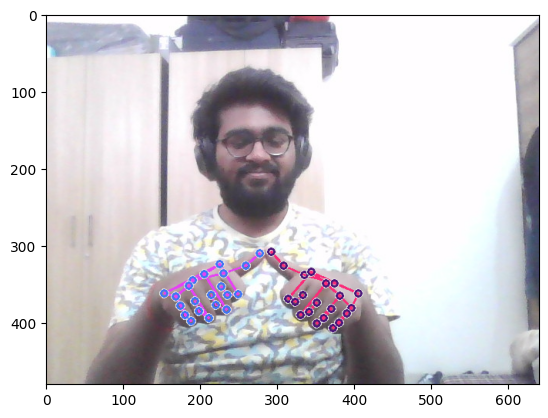

In [11]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))